# LAPLACE TRANSFORMS FOR REACTION NETWORKS

331890712

# Review Questions

email your answer to these questions to joseph.hellerstein@gmail.com

1. What is a signal?
1. What is a system?
1. How do Laplace transforms help with analyzing signals and systems?
1. What is a transfer function?
1. What is the significance of the poles of a transfer function?
1. What is the impulse response of a system and why is it important?
1. What is the step response (DC gain) of a system and why is it important?

# Preliminaries

In [1]:
!pip -q install controlSBML
import controlSBML as ctl
import control
from controlSBML.util import makeSimulationTimes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import tellurium as te
import sympy
print("controlSBML version: " + ctl.__version__)

     |████████████████████████████████| 357 kB 32.9 MB/s 
     |████████████████████████████████| 8.7 MB 39.7 MB/s 
     |████████████████████████████████| 154 kB 45.2 MB/s 
     |████████████████████████████████| 437 kB 47.4 MB/s 
     |████████████████████████████████| 6.9 MB 43.6 MB/s 
     |████████████████████████████████| 121 kB 51.9 MB/s 
     |████████████████████████████████| 428 kB 54.7 MB/s 
     |████████████████████████████████| 343 kB 57.8 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 561 kB 54.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 130 kB 54.7 MB/s 
     |████████████████████████████████| 132 kB 61.2 MB/s 
     |████████████████████████████████| 250 kB 53.3 MB/s 
     |████████████████████████████████| 103 kB 61.1 MB/s 
     |████████████████████████████████| 57 kB 5.4 MB/s 
     |████████████████

In [2]:
s, S1, S2, S3, k1, k2, k3, k4 = sympy.symbols("s, S1, S2, S3, k1, k2, k3, k4 ")

# LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$

# Sequential Pathway

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$

Find the transfer function for $\frac{S_3}{S_1}$

## Steps
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

### Specify the input and output for the transfer function

This is specified in the problem. The input is $S_1$ and the output is $S_3$.

### Write the system equations

The reactions are:

    S1 -> S2; k1*S1
    S2 -> S3; k2*S2

From inspections, the system equations are:

\begin{eqnarray}
\dot{S}_1 & = & -k_1 S_1  \\
\dot{S}_2 & = & - k_2 S_2 + k_1 S_1 \\
\dot{S}_3 & = & k_2 S_2  \\
\end{eqnarray}

### Convert the system equations to Laplace transforms

This is a mechanical process based on the fact that $L[\dot{g}(t)] = s G(s)$,
where $L[g(t)] = G(s)$.

\begin{eqnarray}
s S_1(s) & = & -k_1 S_1 (s) \\
sS_2 (s) & = & -k_2 S_2(s) + k_1 S_1(s) \\
s S_3(s) & = & k_2 S_2 (s) \\
\end{eqnarray}

### Solve for LT of the output in terms of the input and form the ratio

Calculate $\frac{S_3(s)}{S_1(s)}$.

$S_2 (s) = \frac{k_1 S_1(s)}{s + k_2}$

\begin{eqnarray}
s S_3 (s) & = & k_2 \frac{k_1 S_1(s)}{s + k_2} \\
\frac{S_3 (s)}{S_1 (s)} & =&   \frac{1}{s} \frac{k_1 k_2}{s + k_2} \\
\end{eqnarray}

$G(s) = \frac{Y(s)}{U(s)}$

Response to intial conditons (u(0) = 1)
or unit impulse response. $y( \infty) = lim_{s->0} s G(s)$

## Simulate to check

We explore two simulations. The first is impulse response.
Here, the input has a constant value for 1 time unit (to approximate an impulse), and
then it's 0.
The constant value is indicated by using a dollar sign (``$``)
in front of the variable name.

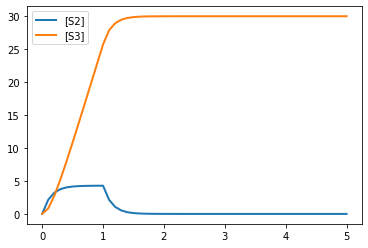

In [18]:
impulse_model = """
$S1 -> S2; k1*$S1
S2 -> S3; k2*S2

$S1 = 10
S2 = 0
S3 = 0
k1 = 3
k2 = 7

at (time > 1): $S1 = 0
"""
rr = te.loada(model)
data = rr.simulate()
rr.plot()

Note that the output, ``S3``, is 3 times the input, ``S1``.
This is predicted by the transfer function
$G(s) = \frac{S_3 (s)}{S_1 (s)} =   \frac{1}{s} \frac{k_1 k_2}{s + k_2}$
since $lim_{s \rightarrow 0} sG(s) = k_1 =3$;
that is, the output is three times larger than the input.

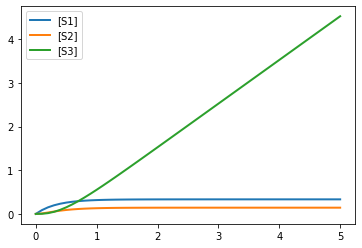

In [8]:
step_model = """
 -> S1; 1
S1 -> S2; k1*S1
S2 -> S3; k2*S2

S1 = 0
S2 = 0
S3 = 0
k1 = 3
k2 = 7
"""
rr = te.loada(step_model)
data = rr.simulate()
rr.plot()

## Analysis

**Interpret impulse response**

### Poles

### Response to initial conditions

### DC Gain (Step Response)

# Branching

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_2 \xrightarrow[\text{}]{k_3 S_2} S_4$


Find the transfer function for $\frac{S_3}{S_1}$

# Reversible Reaction

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_1$


Find the transfer function for $\frac{S_2}{S_1}$

### Write the system equations

### Find the transfer function

What is $\frac{k_1}{k_2}$ in terms of first year chemistry?

# Nonlinear

$S_1 \xrightarrow[\text{}]{k_1 S_1 } S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_1 S_2} S_3$

Find the transfer function for $\frac{S_3}{S_1}$

# Sequential Pathway With a Reversible Reaction

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,
$S_3 \xrightarrow[\text{}]{k_4 S_3} \emptyset$

Find the transfer function for $\frac{S_3}{S_1}$

### Write the state equations

### Convert the system equations to Laplace Transforms

### Express the output in terms of the input

## Simulation